In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier

In [10]:
def frange(start, stop, step):
     x = start
     while x < stop:
         yield x
         x += step

In [43]:
x = pd.read_csv('data_week_X.csv', ',').as_matrix()
y = pd.read_csv('data_week_Y.csv', ',').as_matrix()
Y = []
for i in range(np.size(y)):
    Y.append(y[i][0])
y = Y
print('check that X and Y arrays equal size')
print(np.size(x,0), np.size(y))
trainStart = 0
trainEnd = 1200
x_train = x[trainStart:trainEnd]
y_train = y[trainStart:trainEnd]
x_test = x[trainEnd:]
y_test = y[trainEnd:]
print('traning to test proportion')
print(np.size(x_train,0), np.size(x_test,0))

check that X and Y arrays equal size
1454 1454
traning to test proportion
1200 254


In [45]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print(recall, precision) # the percent of crises, which was correctly predicted
print('\n', y_predict)

254 245 12
1.0 0.0489795918367

 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [49]:
for w in frange(0, 0.3, 0.01):
    clf = LogisticRegression(class_weight={0: w, 1: 1-w})
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res = recall_score(y_test, y_predict, average='binary')
    random = round(sum(y_predict)/len(y_test), 3)
    print('%.2f \t' % random,'%.3f\t' % round(res, 3), sum(y_predict), 'win over random = ', res-random)

1.00 	 1.000	 254 win over random =  0.0
1.00 	 1.000	 254 win over random =  0.0
1.00 	 1.000	 254 win over random =  0.0
0.97 	 0.917	 247 win over random =  -0.0553333333333
0.96 	 0.917	 245 win over random =  -0.0483333333333
0.96 	 0.917	 245 win over random =  -0.0483333333333
0.96 	 0.917	 244 win over random =  -0.0443333333333
0.96 	 0.917	 244 win over random =  -0.0443333333333
0.94 	 0.917	 238 win over random =  -0.0203333333333
0.88 	 0.917	 223 win over random =  0.0386666666667
0.82 	 0.667	 208 win over random =  -0.152333333333
0.79 	 0.667	 201 win over random =  -0.124333333333
0.73 	 0.583	 185 win over random =  -0.144666666667
0.62 	 0.583	 157 win over random =  -0.0346666666667
0.12 	 0.167	 31 win over random =  0.0446666666667
0.26 	 0.167	 66 win over random =  -0.0933333333333
0.16 	 0.083	 40 win over random =  -0.0736666666667
0.10 	 0.083	 26 win over random =  -0.0186666666667
0.07 	 0.000	 17 win over random =  -0.067
0.04 	 0.000	 9 win over random =

0.01 	 0.000	 2 win over random =  -0.008
0.01 	 0.000	 2 win over random =  -0.008
0.01 	 0.000	 2 win over random =  -0.008


In [48]:
clf = LogisticRegression(class_weight={0: 0.1, 1: 0.9})
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [18]:
clf = SVC()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
res = recall_score(y_test, y_predict, average='binary')
print(sum(y_predict), sum(y_test))
print(res) # the percent of crises, which was correctly predicted

0 12
0.0


In [20]:
X_embedded = TSNE(n_components=2, learning_rate=1000.0).fit_transform(x)
X_embedded.shape

(1454, 2)

(1454, 2) 1454


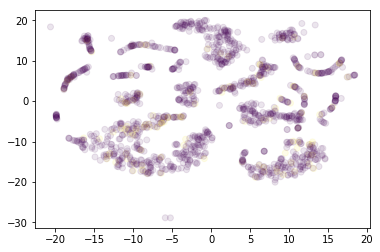

In [21]:
print(X_embedded.shape, np.size(y))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, alpha=0.1)
plt.show()

In [21]:
clf = MLPClassifier(solver='lbfgs', alpha=1, random_state=1, max_iter=1000)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print('%.2f \t' % round(recall, 3), '%.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print(y_predict)

254 25 12
0.08 	 0.04 	
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [50]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)
y_predict_1 = clf.predict(x_test)

w=0.135
clf = LogisticRegression(class_weight={0: w, 1: 1-w})
clf.fit(x_train, y_train)
y_predict_2 = clf.predict(x_test)

clf = MLPClassifier(solver='lbfgs', alpha=1, random_state=1, max_iter=1000)
clf.fit(x_train, y_train)
y_predict_3 = clf.predict(x_test)

y_predict = []
for i in range(np.size(y_predict_1)):
    y_predict.append((y_predict_1[i] + y_predict_2[i] + y_predict_3[i])/3.0)
    if y_predict[i] > 0.4:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print('frequence of crises prediction: %.2f \t' % round(sum(y_predict)/np.size(y_predict),2), sum(y_test))
print('recall %.2f \t' % round(recall, 3), 'precision %.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print('improve over statistical random: %.2f \t' % round(recall - sum(y_predict)/np.size(y_predict),3))
print(y_predict)

frequence of crises prediction: 0.25 	 12
recall 0.33 	 precision 0.06 	
improve over statistical random: 0.09 	
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
y_predict = []
for i in range(np.size(y_predict_1)):
    y_predict.append((y_predict_2[i] + y_predict_3[i])/2.0)
    if y_predict[i] > 0.6:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print('%.2f \t' % round(recall, 3), '%.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print(y_predict)

254 2 12
0.00 	 0.00 	
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
